In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

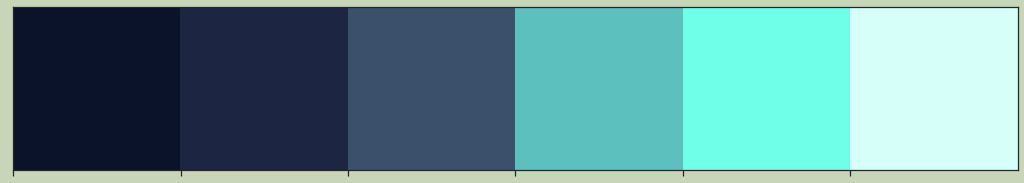

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 20)

colors = ["#0B132B","#1C2541","#3A506B","#5BC0BE","#6FFFE9", "#d6fff9"]

sns.set(palette=colors, style='ticks', 
        rc={'axes.facecolor':'#f0f7f4', 'figure.facecolor':'#C8D5B9', 'figure.figsize':(16,12), 
            'font.family':'Product Sans', 'patch.linewidth': 0.0, 'font.size':12}, )

sns.palplot(colors, size=3)

# Setting up Data

In [3]:
df = pd.read_csv('data/clean.csv')
df.head()

,age,gender,year,course,gwa,openness_to_experience,conscientiousness,extroversion,agreeableness,neuroticism
0,21,1,3,23,1.21,0.500000,0.62500,0.567568,0.423077,0.709677
1,22,0,3,23,1.43,0.583333,0.87500,0.162162,0.230769,0.903226
2,21,1,3,23,1.30,0.583333,0.75000,0.918919,0.615385,0.290323
3,22,1,3,10,1.75,0.541667,0.59375,0.459459,0.538462,0.645161
4,20,0,2,42,1.75,0.166667,0.28125,0.405405,0.384615,0.322581


In [4]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=['gwa'])
y = df['gwa']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=12312131)

Splitting the data into training and testing with 80:20 ratio respectively.

# Regression part 1

Predicting GWA Based on all of the features.

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [6]:
reg_models = [LinearRegression(), RandomForestRegressor(), KNeighborsRegressor(),
         DecisionTreeRegressor(), SVR()]
reg_modelnames = ['linear regression', 'random forest', 'knn', 'decision tree', 'svr']

def test_features(features, testing):
    for model in reg_models:
        model.random_state = 2211
        model.fit(features, y_train)

    preds = [model.predict(testing) for model in reg_models]
    r2 = [r2_score(y_test, pred) for pred in preds]
    mae = [mean_absolute_error(y_test, pred) for pred in preds]
    mse = [mean_squared_error(y_test, pred) for pred in preds]
    results = pd.DataFrame(zip(r2, mae, mse), columns=['r2', 'mae', 'mse'], index=reg_modelnames)

    def maximum_value_in_column(column):    
        highlight = 'background-color: palegreen;'
        default = ''
        min_in_column = column.min()
        return [highlight if v == min_in_column else default for v in column]

    return results.style.apply(maximum_value_in_column, subset=['mae','mse'], axis=0), preds

In [7]:
test = test_features(x_train, x_test)
test[0]

,r2,mae,mse
linear regression,-0.140877,0.231973,0.081524
random forest,0.068004,0.207059,0.066598
knn,0.364722,0.154404,0.045395
decision tree,-1.434497,0.340448,0.173962
svr,0.112988,0.210462,0.063383


# Insights:

1. We fittted 5 models of regression namely: 'linear regression', 'random forest', 'knn', 'decision tree', 'svr' using all features as input.
2. We utilized R2 score, Mean Absolute error, and Mean Squared Error as our metrics for regression.
3. The results of the tested data using the metrics yields the knn as the best model for the data.
4. All of the r2 are negative values. This indicates that data is a bad fit for gwa

In [8]:
results = pd.DataFrame(zip(y_test, test[1][2], y_test - test[1][2]), columns=['Labels', 'Predictions', 'Residuals'])
results

,Labels,Predictions,Residuals
0,1.7100,1.5980,0.1120
1,1.7500,1.7500,0.0000
2,1.5300,1.5120,0.0180
3,1.5000,1.2500,0.2500
4,1.7100,1.7420,-0.0320
5,1.8000,1.6320,0.1680
6,1.4400,1.7800,-0.3400
7,1.3300,1.8040,-0.4740
8,1.7400,1.6165,0.1235
9,1.7500,1.8585,-0.1085


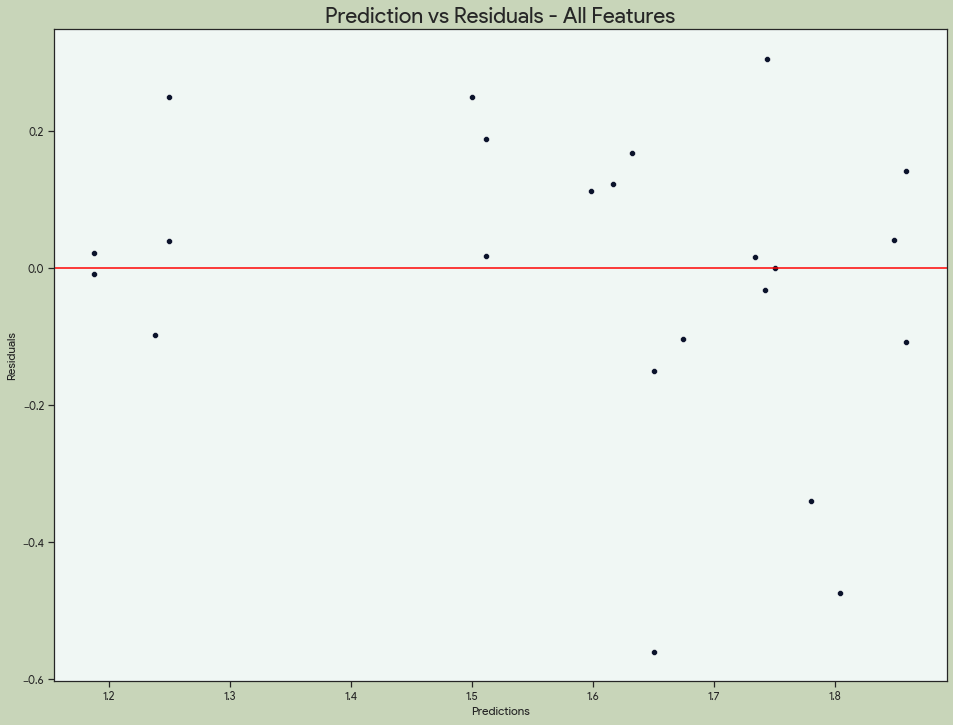

In [9]:
plt.title('Prediction vs Residuals - All Features', fontsize=22)
sns.scatterplot(results['Predictions'], results['Residuals'])
plt.axhline(y = 0, c='r')
plt.savefig('figures/Prediction vs Residuals - All Features.jpg')

# Insights:

1. We plot the data of predictions and residual. The resulting plot shows random distribution which indicates that the features is a not very good predictor of gwa. 
2. The best possible outcome should be that the data points are clustered around the red line which indicates low distance or a low residual.

# Regression part 2

Using The Big Five Personality as Features only.

In [10]:
cols = ['openness_to_experience','conscientiousness','extroversion','agreeableness','neuroticism']

test2 = test_features(x_train[cols], x_test[cols])
test2[0]

,r2,mae,mse
linear regression,-0.069250,0.232587,0.076406
random forest,-0.162289,0.236301,0.083054
knn,-0.185990,0.246431,0.084748
decision tree,-1.484854,0.383709,0.177561
svr,-0.099547,0.234806,0.078571


# Insights:
1. Looks like the best estimator for gwa is the random forest using the big five personality.
2. These features have high mse, mae, and r2 compare to the first testing.
3. The Big Five Personality is a bad fit for gwa.
4. Just like in test above, all of the r2 are negative values. This indicates that big five personality is a bad fit for gwa

In [11]:
results2 = pd.DataFrame(zip(y_test, test2[1][1], y_test - test2[1][1]), columns=['Labels', 'Predictions', 'Residuals'])
results2

,Labels,Predictions,Residuals
0,1.7100,1.539720,0.170280
1,1.7500,1.466100,0.283900
2,1.5300,1.501394,0.028606
3,1.5000,1.437480,0.062520
4,1.7100,1.625206,0.084794
5,1.8000,1.675069,0.124931
6,1.4400,1.538769,-0.098769
7,1.3300,1.538800,-0.208800
8,1.7400,1.666665,0.073335
9,1.7500,1.446509,0.303491


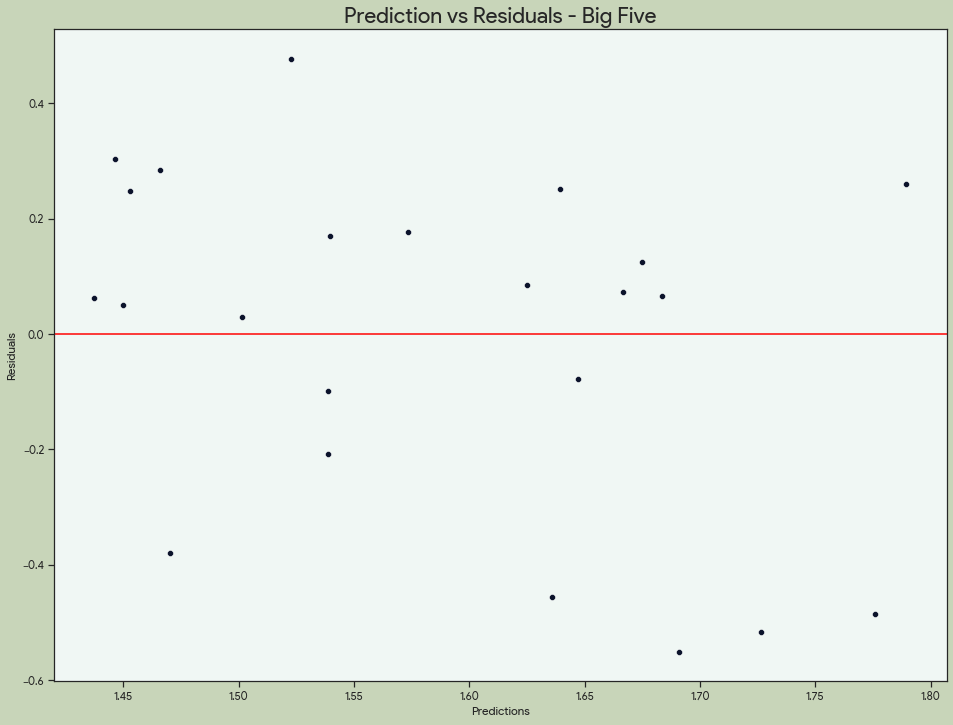

In [12]:
plt.title('Prediction vs Residuals - Big Five', fontsize=22)
sns.scatterplot(results2['Predictions'], results2['Residuals'])
plt.axhline(y = 0, c='r')
plt.savefig('figures/Prediction vs Residuals - Big Five.jpg')

# Insight:
1. The plot shows distribution between prediction and residuals. The less distance to the red line, the better.

# Classification

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Discretization

1. A method for creating classification continuous samples using splitting by range.
2. 1 ~ excellent and 2 ~ satisfactory and 3 ~ pass

In [64]:
def gwa_to_grades(x):
    if x <= 1.5:
        return 1
    elif x <= 2.5:
        return 2
    else:
        return 3

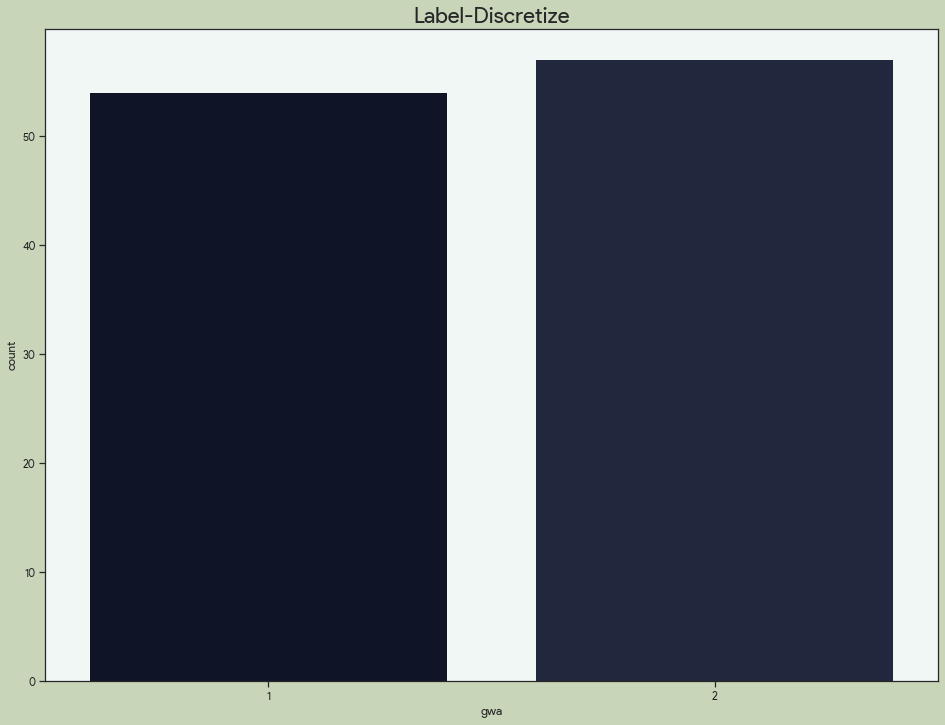

In [65]:
plt.title('Label-Discretize', fontsize=22)
sns.countplot(y.apply(gwa_to_grades))
plt.savefig('figures/Label-Discretize.jpg')

# Insights:

1. Looks like the overall data is not balance. 
2. By Discretizing, the data has now become a binary problem.

In [66]:
y_train = y_train.apply(gwa_to_grades)
y_test = y_test.apply(gwa_to_grades)

In [67]:
x_smo, y_smo = SMOTE(random_state=141).fit_resample(x_train, y_train)

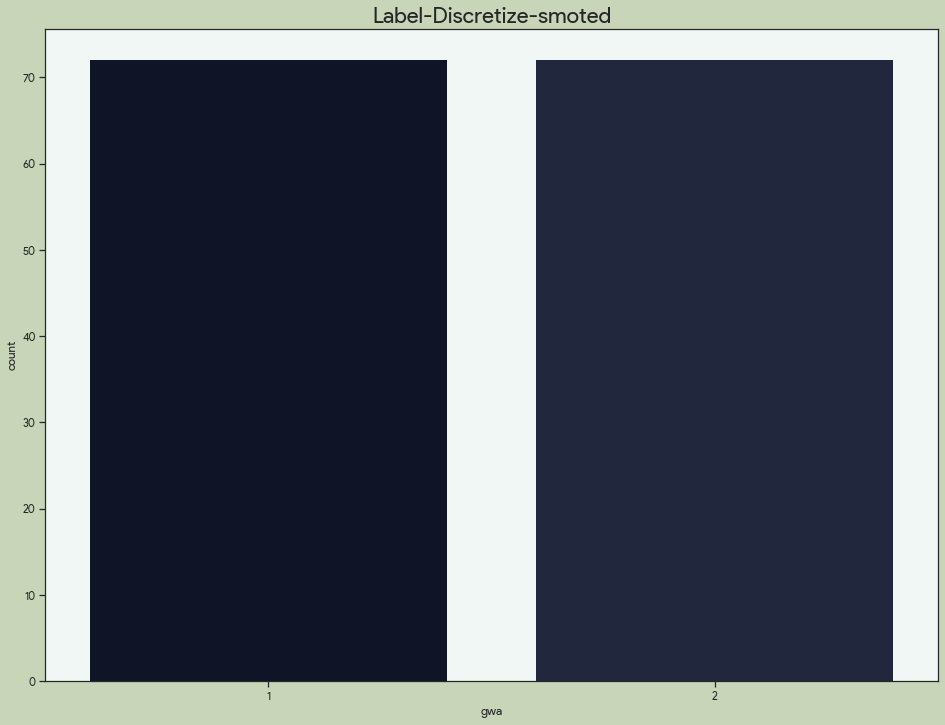

In [68]:
plt.title('Label-Discretize-smoted', fontsize=22)
sns.countplot(y_smo)
plt.savefig('figures/Label-Discretize-smoted.jpg')

# Insights:

1. By using SMOTE-an oversampling technique, the data has now become balance.
2. We can apply accuracy as a metric now that the data is balance.

In [69]:
classify_models = [DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB(),
             KNeighborsClassifier(), SVC(), XGBClassifier()]

classify_modelnames = ['DecisionTreeClassifier', 'RandomForestClassifier', 
                  'GaussianNB', 'KNeighborsClassifier', 'SVC', 'XGBClassifier']

def testing_features(features, test, title):
    for model in classify_models:
        model.random_state = 321
        model.fit(features, y_smo)

    preds = [model.predict(test) for model in classify_models]
    cr = [classification_report(y_test, pred) for pred in preds]
    acs = [accuracy_score(y_test, pred) for pred in preds]
    cm = [confusion_matrix(y_test, pred) for pred in preds]

    i =0 
    for x in acs:
        print('accuracy for model ', classify_modelnames[i], ' is: ', np.round(x*100, 2))
        i += 1

    i =0 
    for c in cr:
        print(classify_modelnames[i])
        print(c)
        i += 1

    fig, ax = plt.subplots(3,2, figsize=(18,12))
    ax = ax.flatten()
    fig.suptitle(title, fontsize=32)
    i=0

    for c in cm:
        plot= sns.heatmap(c, annot=True, cbar= False, cmap=colors, ax=ax[i])
        plot.set_title(classify_modelnames[i])
        i += 1


    fig.tight_layout()
    sns.despine()

    plt.savefig('figures/'+title+'.jpg')

# Classification part 1 - All Features

[18:16:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy for model  DecisionTreeClassifier  is:  73.91
accuracy for model  RandomForestClassifier  is:  78.26
accuracy for model  GaussianNB  is:  69.57
accuracy for model  KNeighborsClassifier  is:  52.17
accuracy for model  SVC  is:  34.78
accuracy for model  XGBClassifier  is:  69.57
DecisionTreeClassifier
              precision    recall  f1-score   support

           1       0.84      0.84      0.84        19
           2       0.25      0.25      0.25         4

    accuracy                           0.74        23
   macro avg       0.55      0.55      0.55        23
weighted avg       0.74      0.74      0.74        23

RandomForestClassifier
              precision    re

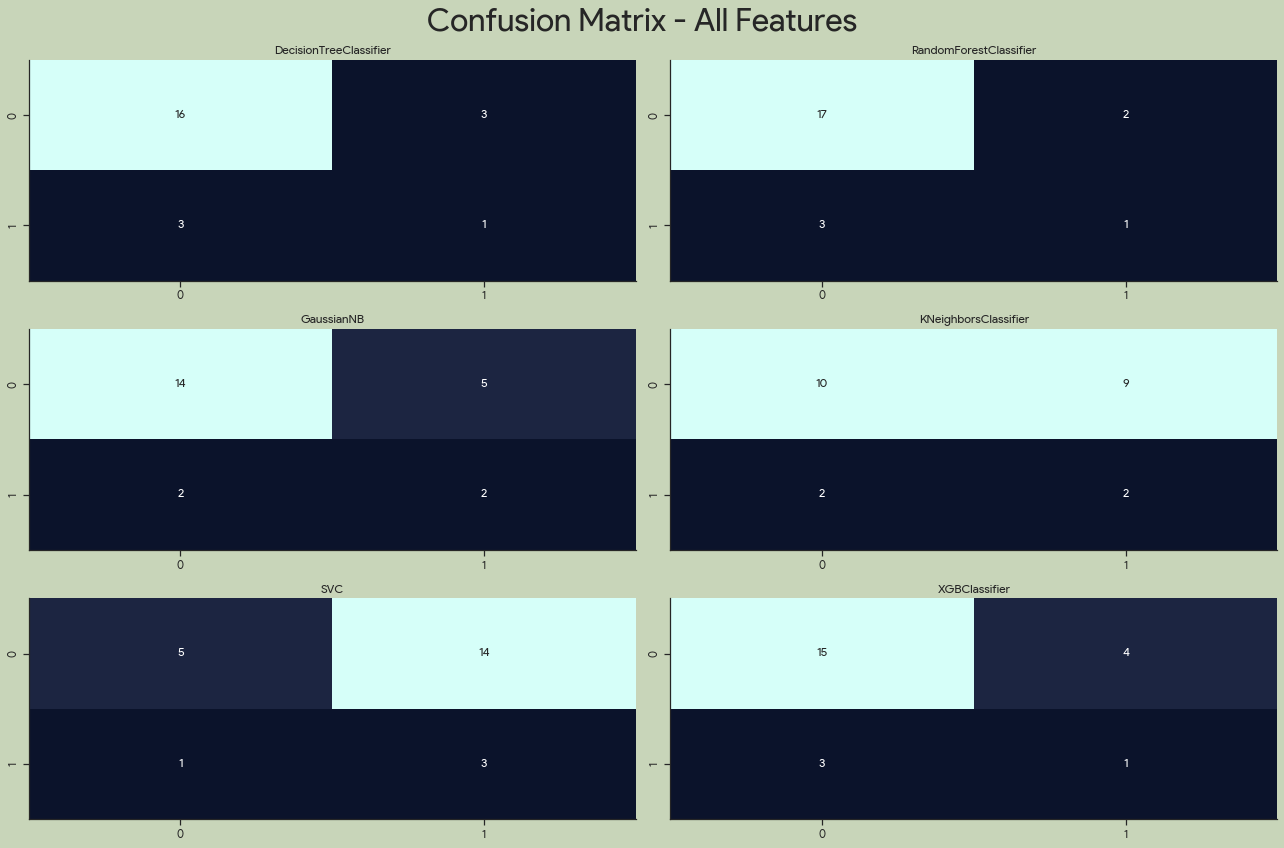

In [70]:
testing_features(x_smo, x_test, 'Confusion Matrix - All Features')

# Insights:

1. The model Random Forest Classifier performs the best!!! with 78% accuracy.
2. The other models perform badly with the lowest of 34% which is SVC
3. Lowest accuracy model may need to find optimal number of parameters to perform better

# Classification part 2 - Big Five Personality

[18:16:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy for model  DecisionTreeClassifier  is:  69.57
accuracy for model  RandomForestClassifier  is:  78.26
accuracy for model  GaussianNB  is:  78.26
accuracy for model  KNeighborsClassifier  is:  52.17
accuracy for model  SVC  is:  69.57
accuracy for model  XGBClassifier  is:  78.26
DecisionTreeClassifier
              precision    recall  f1-score   support

           1       0.83      0.79      0.81        19
           2       0.20      0.25      0.22         4

    accuracy                           0.70        23
   macro avg       0.52      0.52      0.52        23
weighted avg       0.72      0.70      0.71        23

RandomForestClassifier
              precision    re

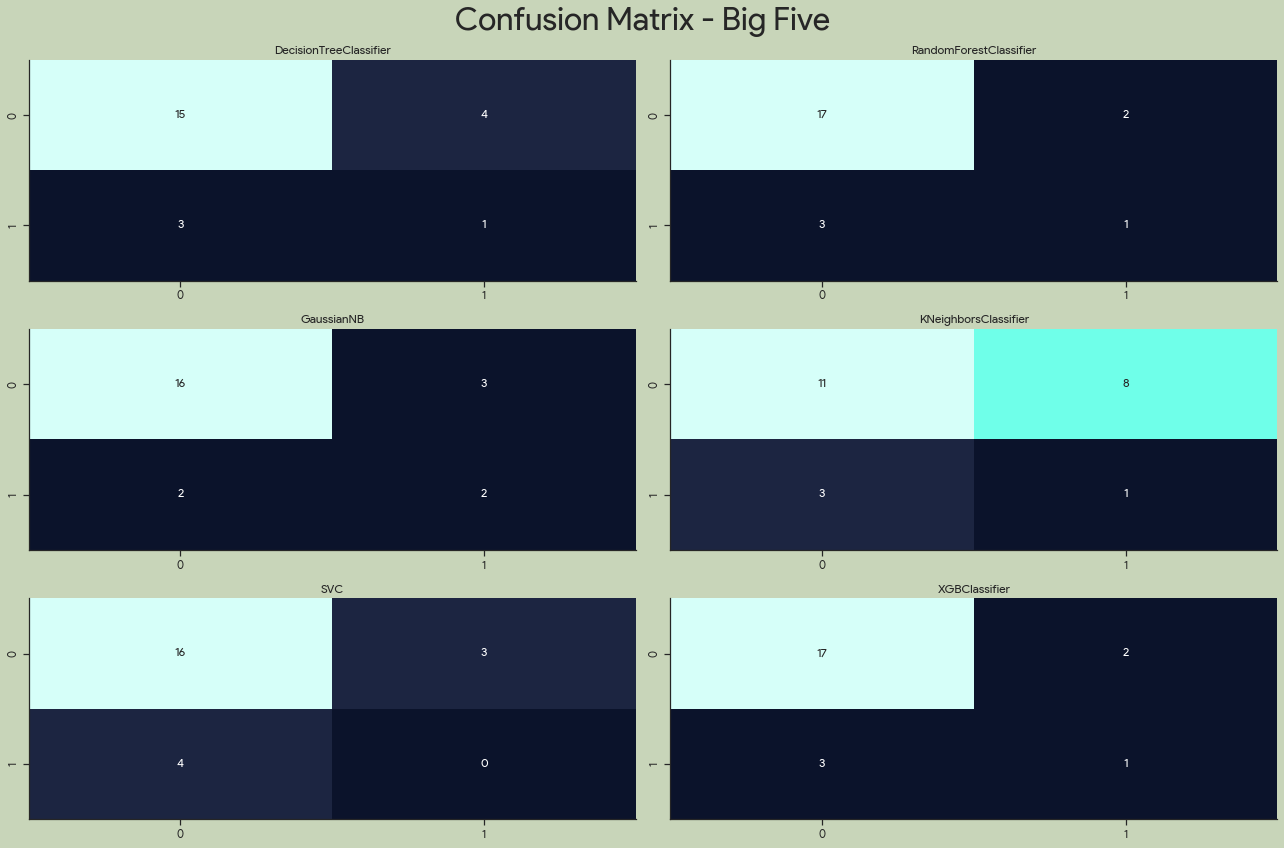

In [71]:
testing_features(x_smo[cols], x_test[cols], 'Confusion Matrix - Big Five')

# Insights:

1. Surprsingly, there are three models that achieved the highest score.
2. RandomForest, GaussianNB, and XGB Classifiers havee achieved 78.26 accuracy using the big five personality
3. Since Random Forest achieved both the highest score in test1 and test2, the model we will use is Random Forest

# Checking Training and Test Results

In [40]:
train_acc = [model.score(x_smo[cols], y_smo) for model in classify_models]
test_acc = [model.score(x_test[cols], y_test) for model in classify_models]

cls = pd.DataFrame()
cls['model'] = classify_modelnames*2
cls['scores'] = train_acc + test_acc
cls['sample'] = (['train'] *6) + (['test'] *6)
cls

,model,scores,sample
0,DecisionTreeClassifier,1.000000,train
1,RandomForestClassifier,1.000000,train
2,GaussianNB,0.715278,train
3,KNeighborsClassifier,0.791667,train
4,SVC,0.847222,train
5,XGBClassifier,1.000000,train
6,DecisionTreeClassifier,0.695652,test
7,RandomForestClassifier,0.782609,test
8,GaussianNB,0.782609,test
9,KNeighborsClassifier,0.521739,test


<AxesSubplot:xlabel='model', ylabel='scores'>

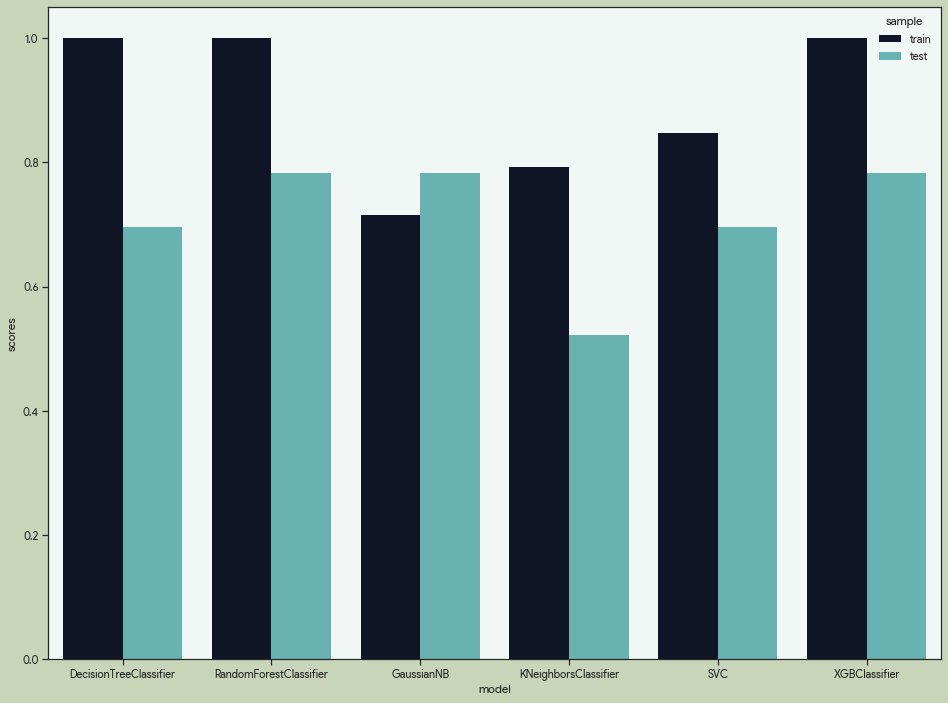

In [37]:
sns.barplot(x=cls['model'], y=cls['scores'], hue=cls['sample'], palette=colors[::3])

# Insight
1. We can see some overfitting issues which is displayed by models that have large margin between the training and testing. 
2. There is one model which achieved a test score higher than its training which is Gaussian NB.

# Model Interpretability

In [41]:
from sklearn.tree import export_graphviz
import os

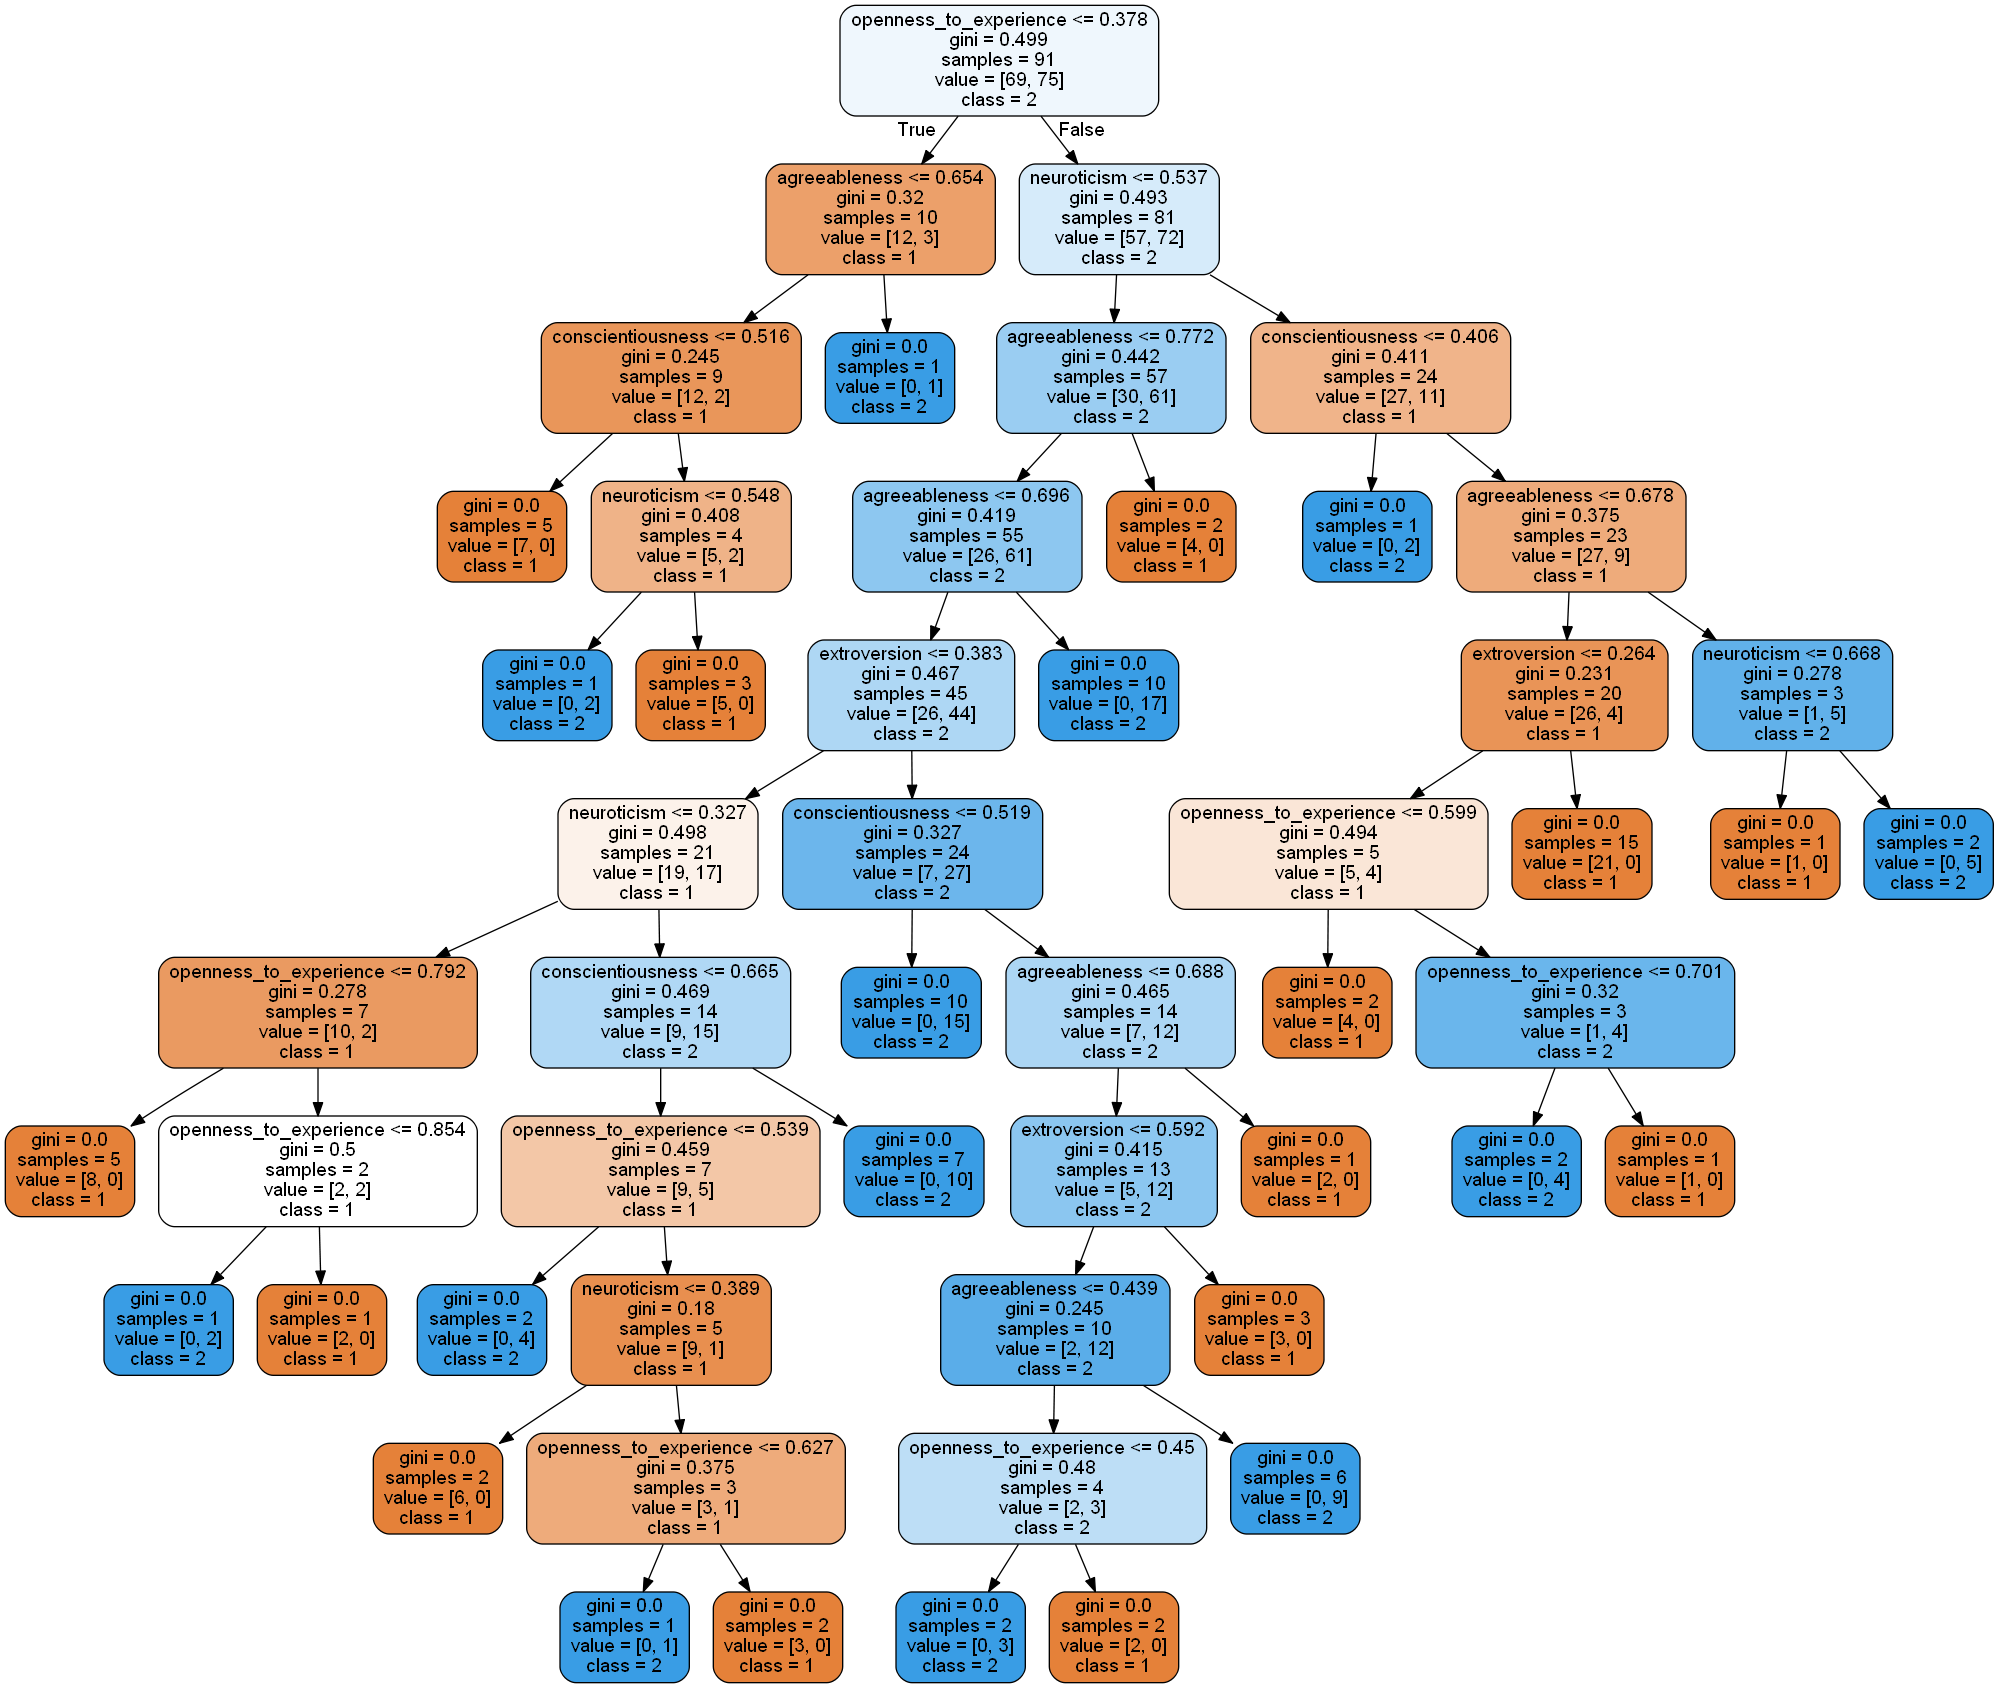

In [73]:
export_graphviz(classify_models[1].estimators_[32], 
                feature_names=x_smo[cols].columns, 
                class_names=['1','2'], rounded=True,
               filled=True, out_file='decisiontree.dot')

os.system('dot -Tpng decisiontree.dot -o decisiontree.png')

from IPython.display import Image
Image(filename = 'decisiontree.png')

# Insight

A sample of the randomforest's decision tree. A random forest is compose of many decision trees. However, they are a weak classifier because of their limited depth to avoid overfitting. The prediction of the random forest is based on majority voting of the decision trees. Here is a sample of the model classifier to predict the student's performance whether he/she is excellent or satisfactory based on Big Five Personality.

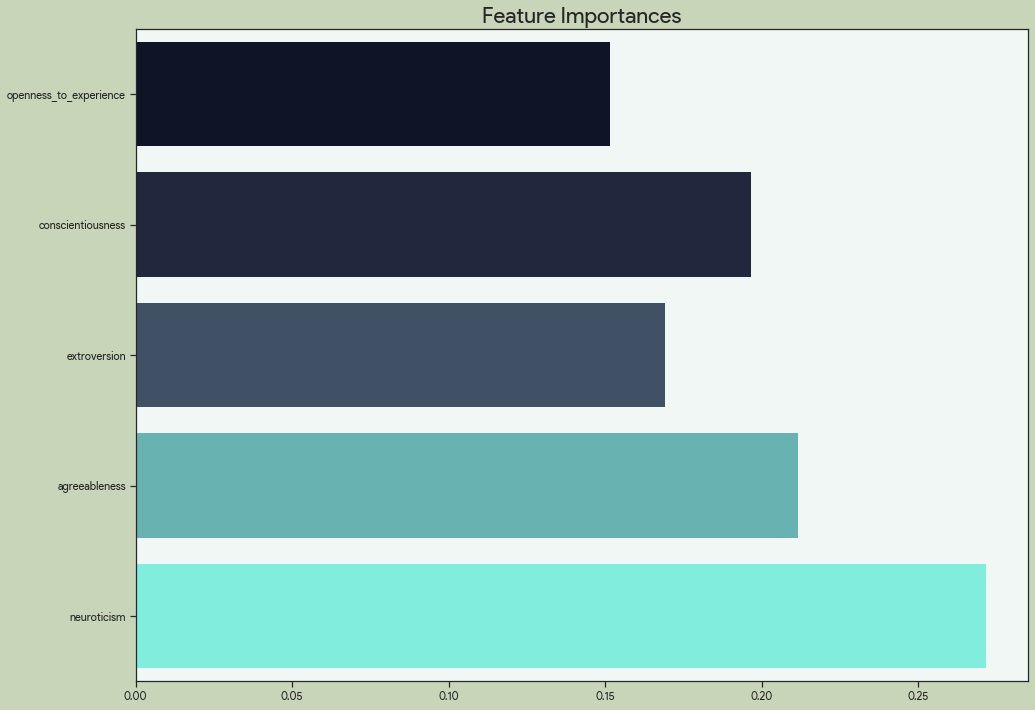

In [74]:
plt.title('Feature Importances', fontsize=22)
sns.barplot(x=classify_models[1].feature_importances_, y=cols)
plt.savefig('figures/Feature Importances.jpg')

# Insight

This is the models feature importance. This indicates how features affects the model's prediction. In this case, neuoriticism has the most impact on model prediction.

# Model Testing Prediction

In [124]:
def test_model(o, c, e, a, n):
    o /= 40
    c /= 40
    e /= 40
    a /= 40
    n /= 40
    test = np.array((o,c,e,a,n))
    prediction = classify_models[1].predict([test])[0] - 1
    labels = ['excellent', 'satisfactory']
    print('Random Forest Classifies: ', labels[prediction])

In [134]:
test_model(3, 32, 3, 1, 15)

Random Forest Classifies:  satisfactory


In [129]:
test_model(2, 15, 22, 11, 5)

Random Forest Classifies:  excellent


# Model Saving

In [51]:
import joblib
joblib.dump(classify_models[1], 'DecisionTreeClassifier.pkl')

['DecisionTreeClassifier.pkl']